 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [332]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [333]:
# Reading whale returns

whale_path=Path("Resources/whale_returns.csv")
algo_path=Path("Resources/algo_returns.csv")
sp500_path=Path("Resources/sp500_history.csv")
goog_path=Path("Resources/goog_historical.csv")
aapl_path=Path("Resources/aapl_historical.csv")
cost_path=Path("Resources/cost_historical.csv")
cost_data= pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True).rename_axis("date")
goog_data= pd.read_csv(goog_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True).rename_axis("date")
whale_data=pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True).rename_axis("date")

In [334]:
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


# Counting Nulls

In [335]:
whale_data.isna().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [336]:
#Drop Nulls

whale_data.dropna(inplace=True)

In [337]:
whale_data.isna().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [338]:
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [339]:
# Reading algorithmic returns

algo_data= pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True).rename_axis("date")


In [340]:
# Count nulls

algo_data.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [341]:
# Drop nulls
algo_data.dropna(inplace=True)

In [342]:
algo_data.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [343]:
algo_data.head()

,Algo 1,Algo 2
date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [344]:
# Reading S&P 500 Closing Prices

sp500_data=pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True).rename_axis("date")

In [345]:
# Change column names
sp500_data.rename(columns={"Close":"price"}, inplace=True)
sp500_data

,price
date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [346]:
# Check data types
sp500_data.dtypes


price    object
dtype: object

In [347]:
#Drop the dollar sign from the price and then fix the daily 
sp500_data["price"]=sp500_data["price"].str.replace("$"," ")
sp500_data.dtypes

price    object
dtype: object

In [348]:
# Fix Data Types
sp500_data["price"]=sp500_data["price"].astype("float")
sp500_data.dtypes

price    float64
dtype: object

In [349]:
# Calculate Daily Returns and drop null

sp500_srtd=sp500_data.sort_index()

sp500_srtd_ret=sp500_srtd.pct_change()

sp500_srtd_ret

# sp500_rt=sp500_data.pct_change()

# sp500_rt.head()

,price
date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [350]:
# Drop nulls
sp500_srtd_ret.dropna(inplace=True)
sp500_srtd_ret.head()

# sp500_rt.dropna(inplace=True)
# sp500_rt.head()

,price
date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [351]:
# Rename `Close` Column to be specific to this portfolio.
sp500_srtd_ret.rename(columns={"price":"S&P 1 day ret"}, inplace=True)
sp500_srtd_ret.loc["2015-03-04"]
# sp500_rt.rename(columns={"price":"S&P 1 day ret"}, inplace=True)
# sp500_rt

S&P 1 day ret   -0.004389
Name: 2015-03-04 00:00:00, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [352]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
ret_comb=pd.concat([whale_data, algo_data, sp500_srtd_ret],axis="columns" ,join="inner")
ret_comb

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 1 day ret
date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='date'>

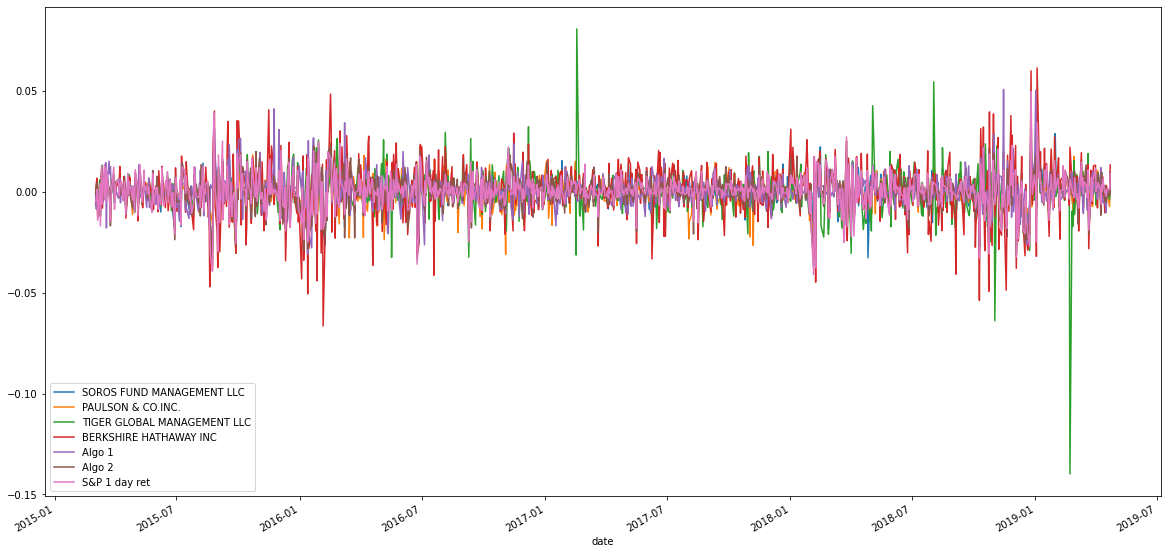

In [354]:
# Plot daily returns of all portfolios

ret_comb.plot(figsize=(20,10))


#Setting plot size
# figure, axes = plt.subplots(nrows=1, ncols=2, sharex=True)

#Defining the plot
#ax=plt.gca()
# ret_comb.plot(y=["SOROS FUND MANAGEMENT LLC"])
# ret_comb.plot(y=["PAULSON & CO.INC"])

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='date'>

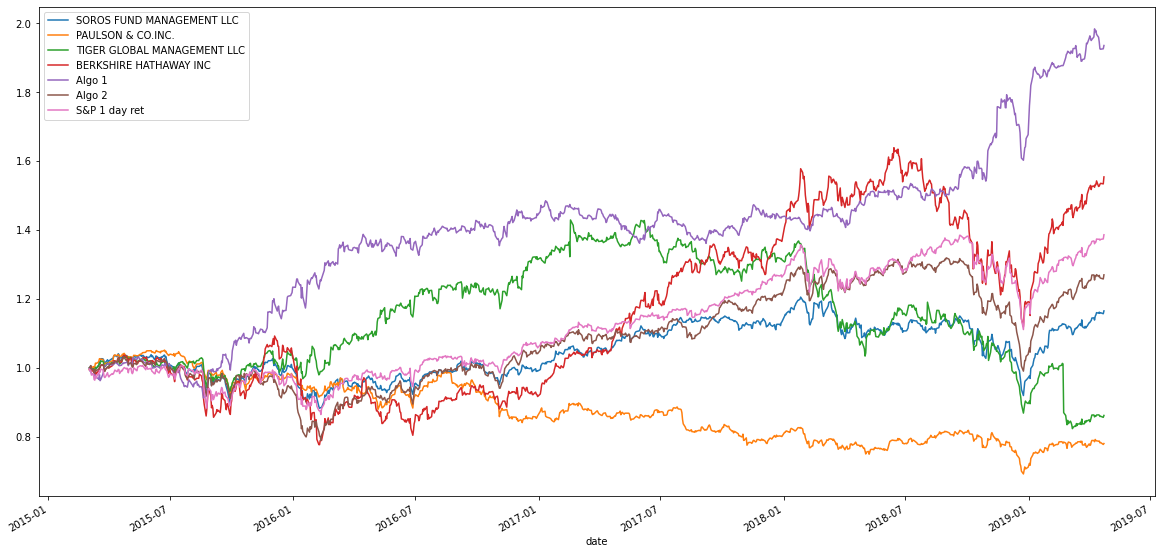

In [355]:
# Calculate cumulative returns of all portfolios

df_ret_cum = (1+ ret_comb).cumprod()


# Plot cumulative returns
df_ret_cum.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

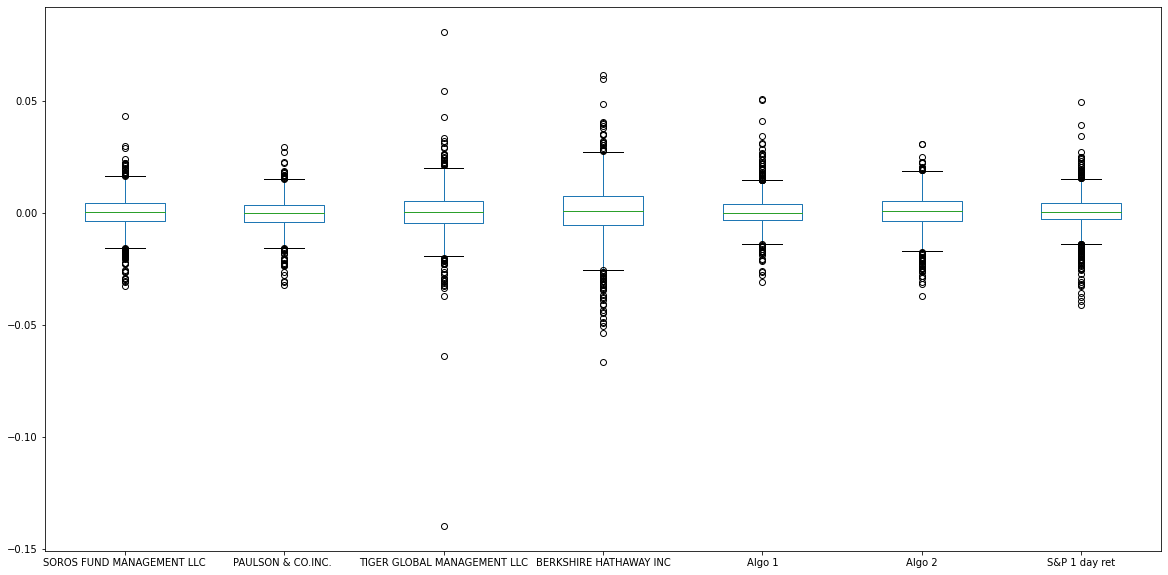

In [356]:
# Box plot to visually show risk
ret_comb.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [362]:
# Calculate the daily standard deviations of all portfolios

sd=ret_comb.std()
#sd.head()
std_dev = pd.DataFrame(sd).rename(columns = {0:"std dev"})
std_dev

,std dev
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 1 day ret,0.008554


### Determine which portfolios are riskier than the S&P 500

In [379]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500

risky_port=std_dev.loc[std_dev["std dev"] > std_dev.loc["S&P 1 day ret", "std dev"]]

risky_port



,std dev
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [380]:
# Calculate the annualized standard deviation (252 trading days)

ann_std = std_dev*np.sqrt(252)
ann_std

,std dev
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 1 day ret,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='date'>

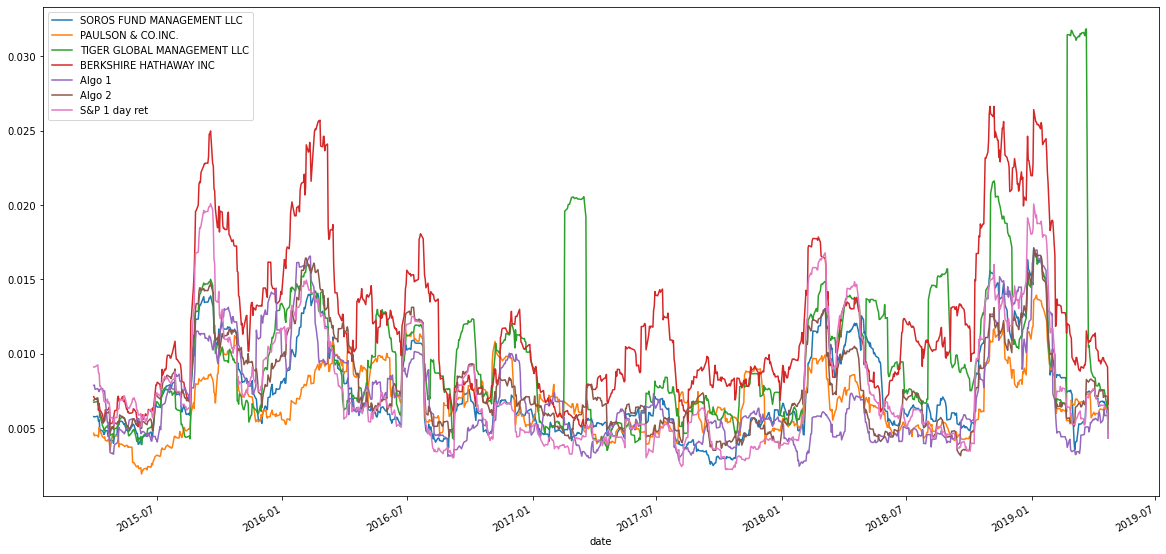

In [381]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

comb_rolling_21 = ret_comb.rolling(window = 21).std()

# Plot the rolling standard deviation



comb_rolling_21.plot(figsize = (20,10))

<AxesSubplot:xlabel='date'>

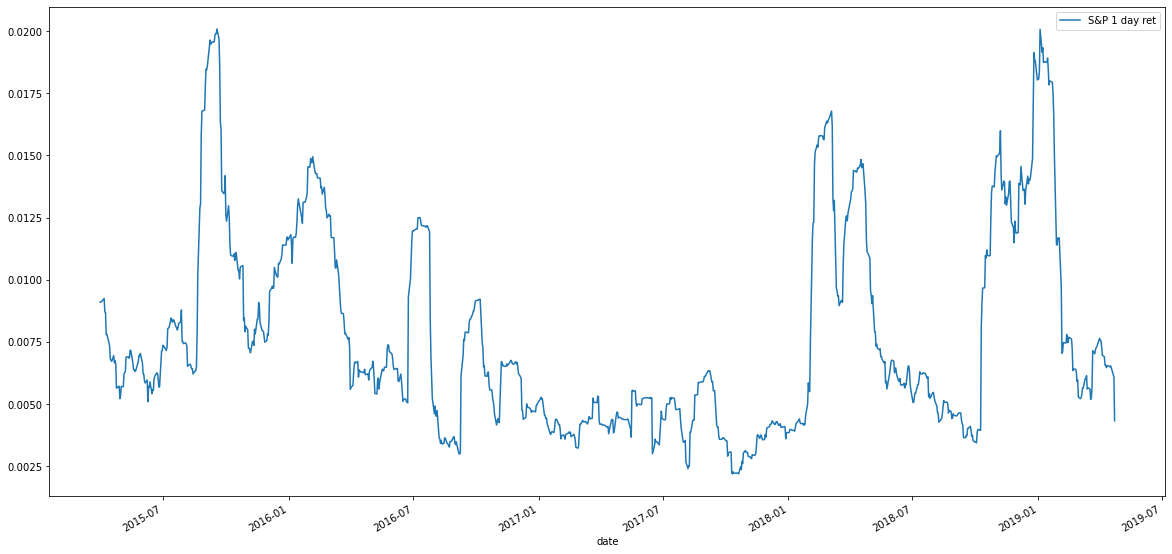

In [382]:
# Calculate the rolling standard deviation for S&P 500 using a 21-day window

sp_rolling_21 = ret_comb[["S&P 1 day ret"]].rolling(window = 21).std()

# Plot the rolling standard deviation



sp_rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [389]:
# Calculate the correlation

corr_comb = ret_comb.corr()

corr_comb

# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 1 day ret
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 1 day ret,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

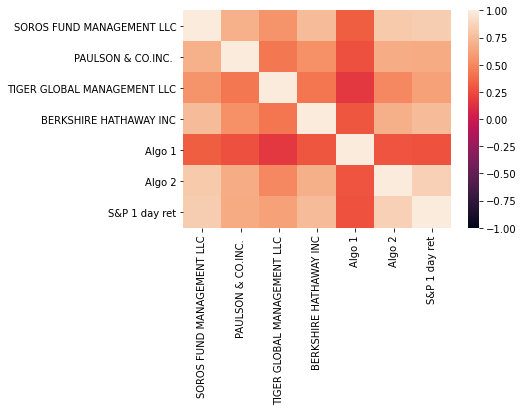

In [450]:
sns.heatmap(corr_comb, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='S&P 1 day ret', ylabel='BERKSHIRE HATHAWAY INC'>

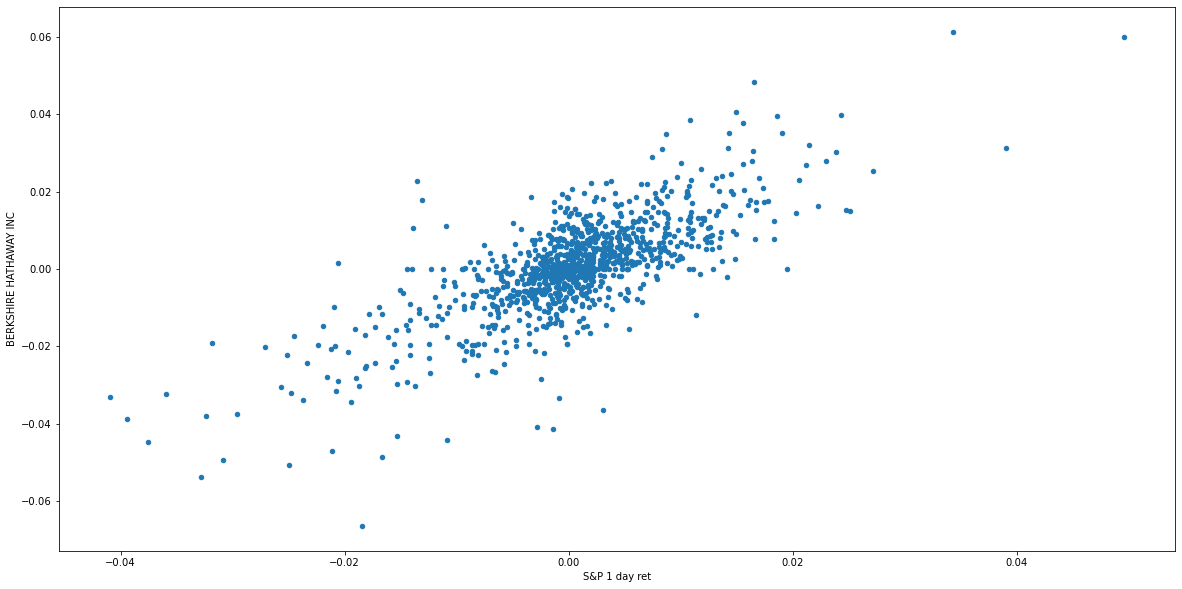

In [396]:
# Calculate covariance of a single portfolio

ret_comb.plot(kind="scatter", y = "BERKSHIRE HATHAWAY INC", x = "S&P 1 day ret", figsize = (20,10))








In [459]:
# Calculate variance of S&P 500

ret_comb["S&P 1 day ret"].var()

#Calculate rolling variance for a 30 day period in order to calculate the 30-day Beta
bksw_covar = ret_comb['BERKSHIRE HATHAWAY INC'].rolling(window=30).cov(ret_comb["S&P 1 day ret"])

In [402]:



# Computing beta

roll_var = ret_comb['S&P 1 day ret'].rolling(window=30).var()
beta30 = bksw_covar / roll_var


<AxesSubplot:xlabel='date'>

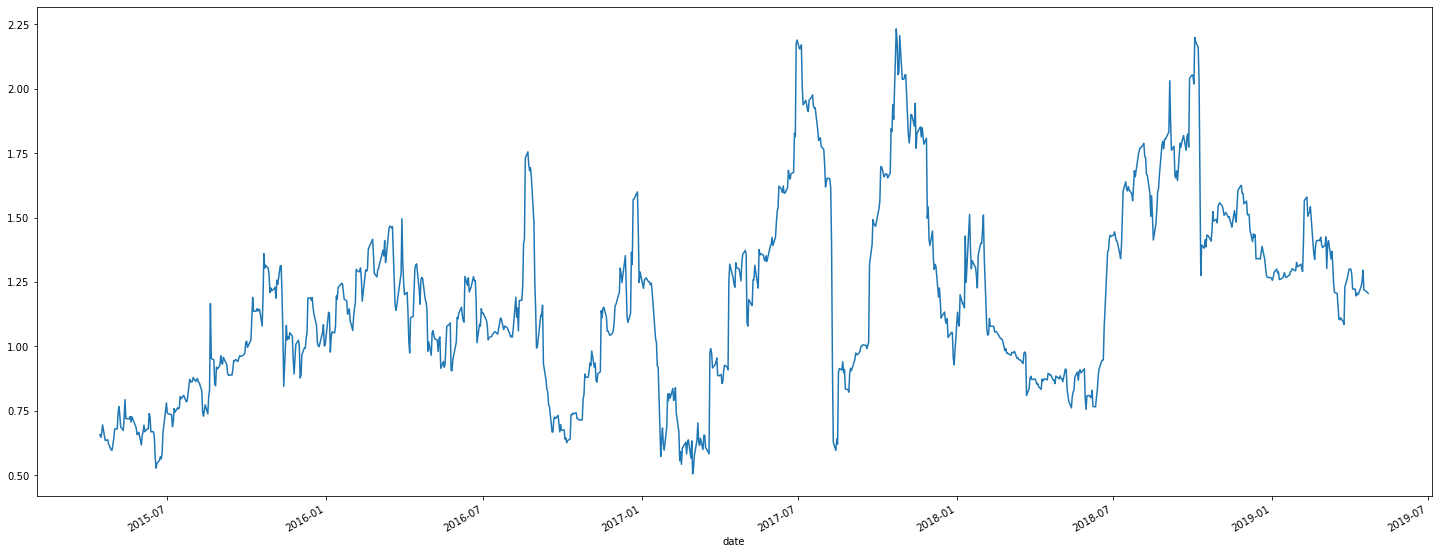

In [403]:
# Plot beta trend
beta30.plot(figsize=(25, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='date'>

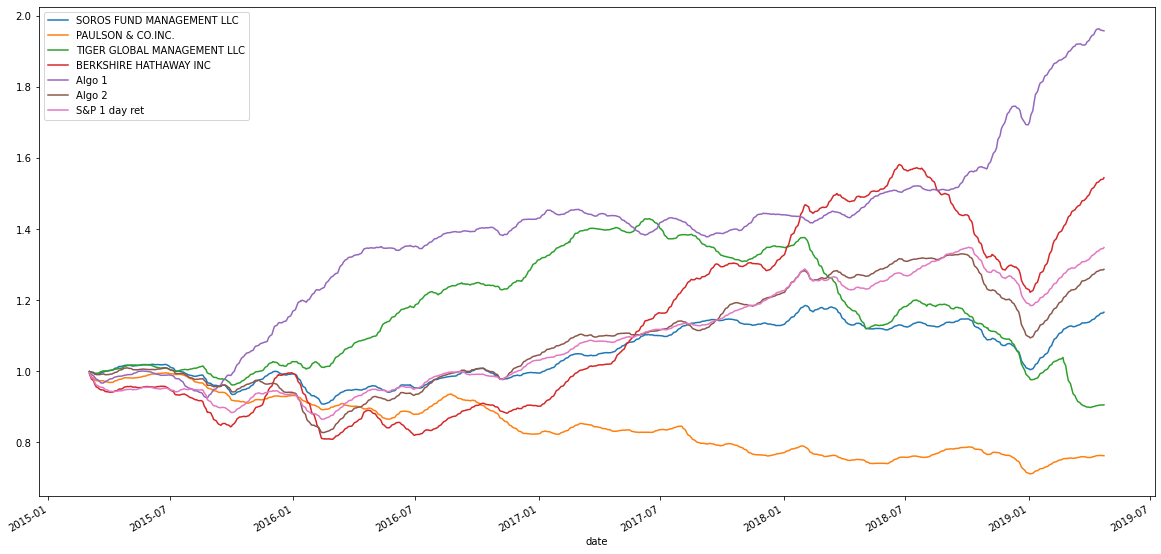

In [404]:
# Use `ewm` to calculate the rolling window
comb_ewm = ret_comb.ewm(span = 21,adjust = False).mean()
(1+comb_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [405]:
# Annualized Sharpe Ratios
sharpe_ratios = ret_comb.mean()*252/(ret_comb.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 1 day ret                  0.648267
dtype: float64

<AxesSubplot:title={'center':'Comparative Sharpe Ratios'}>

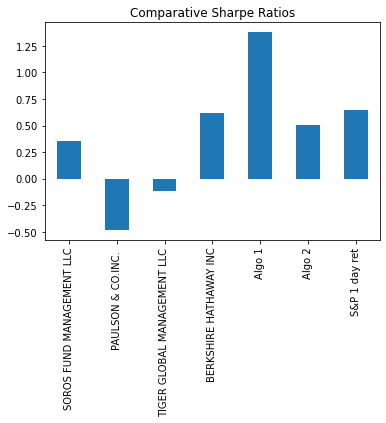

In [406]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Comparative Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

> The Algo 1 trading strategy, based on the Sharpe Ratio parameter, outperforms S&P 500 and the whales

> The Algo 2 trading strategy, on the other hand, while outperforming most of the whales, underperperforms as compared to Berkshire Hathaway and the S&P 500 index

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [431]:
# Reading data from AAPL stock
aapl_history = pd.read_csv(Path("Resources/aapl_historical.csv"), index_col="Trade DATE", 
                           parse_dates = True, infer_datetime_format= True)
aapl_history.rename(columns = {"NOCP":"closing_aapl"}, inplace = True)
aapl_history.drop(columns="Symbol", inplace=True)
aapl_history.head()

,closing_aapl
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [429]:
# Reading data from GOOG stock
goog_history = pd.read_csv(Path("Resources/goog_historical.csv"), index_col="Trade DATE", 
                           parse_dates = True, infer_datetime_format= True)
goog_history.rename(columns = {"NOCP":"closing_goog"}, inplace = True)
goog_history.drop(columns="Symbol", inplace=True)
goog_history.head()

,closing_goog
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [430]:
# Reading data from COST stock

cost_history = pd.read_csv(Path("Resources/cost_historical.csv"), index_col="Trade DATE", 
                           parse_dates = True, infer_datetime_format= True)
cost_history.rename(columns = {"NOCP":"closing_cost"}, inplace = True)
cost_history.drop(columns="Symbol", inplace=True)
cost_history.head()

,closing_cost
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [432]:
# Combine all stocks in a single DataFrame
port_combn=pd.concat((aapl_history, goog_history, cost_history), axis = "columns", join= "inner")
port_combn.sort_index(ascending = True, inplace = True)

port_combn.head()

,closing_aapl,closing_goog,closing_cost
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [434]:
# Reset Date index
port_combn.index = port_combn.index.normalize()
# port_combn.head()

,closing_aapl,closing_goog,closing_cost
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [ ]:
# Reorganize portfolio data by having a column per symbol
# [Abhi]Already done above

In [437]:
# Calculate daily returns
port_ret=port_combn.pct_change()
# Drop NAs
port_ret.dropna(inplace=True)
# Display sample data
port_ret.head()

,closing_aapl,closing_goog,closing_cost
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [440]:
# Set weights

weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

weighted_returns = (weights * port_ret)

port_ret = weighted_returns.sum(axis=1)

# Display sample data

print(port_ret.head())

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [448]:
# Join your returns DataFrame to the original returns DataFrame
Total_ret = pd.concat((port_ret,ret_comb), axis = "columns", join = "inner")
Total_ret.rename(columns = {0:"Abhi_portfolio"}, inplace = True)
Total_ret.head()

,Abhi_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 1 day ret
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [447]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Total_ret.isna().sum()

Abhi_portfolio                 0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 1 day ret                  0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [451]:
# Calculate the annualized `std`
sd2=Total_ret.std()
std_dev_2 = pd.DataFrame(sd2).rename(columns = {0:"std dev"})
std_dev_2


,std dev
Abhi_portfolio,0.013323
SOROS FUND MANAGEMENT LLC,0.009240
PAULSON & CO.INC.,0.007353
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569
Algo 1,0.008423
Algo 2,0.008791
S&P 1 day ret,0.009578


In [454]:
ann_std_2 = std_dev_2*np.sqrt(252)
ann_std_2

,std dev
Abhi_portfolio,0.211496
SOROS FUND MANAGEMENT LLC,0.146675
PAULSON & CO.INC.,0.116732
TIGER GLOBAL MANAGEMENT LLC,0.232531
BERKSHIRE HATHAWAY INC,0.247155
Algo 1,0.133704
Algo 2,0.139556
S&P 1 day ret,0.152054


### Calculate and plot rolling `std` with 21-day window

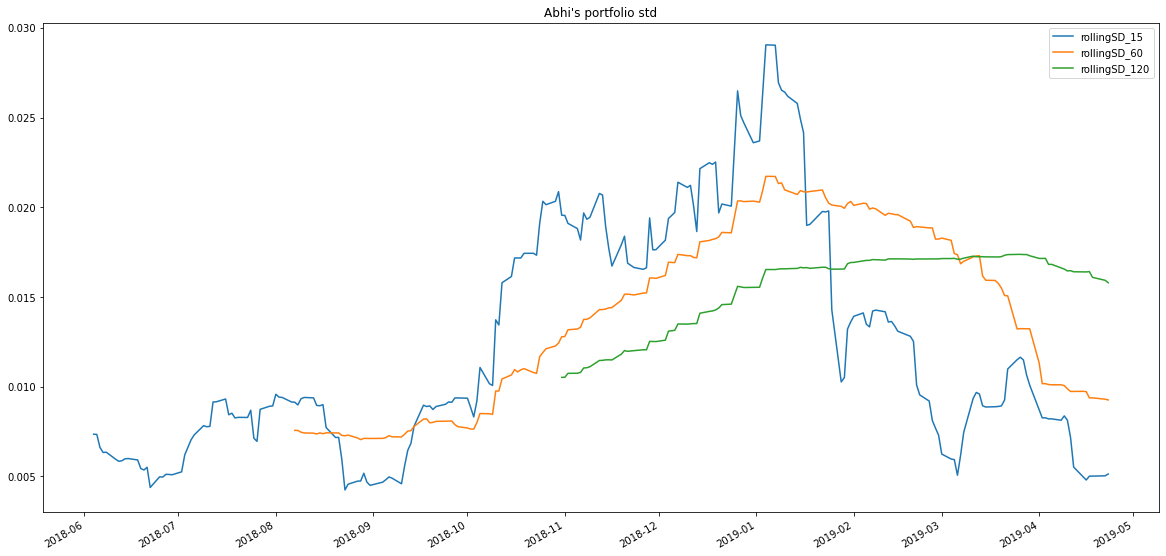

In [456]:
# Calculate rolling standard deviation
Abhi_rollingSD_15 = Total_ret[["Abhi_portfolio"]].rolling(window = 15).std()
Abhi_rollingSD_60 = Total_ret[["Abhi_portfolio"]].rolling(window = 60).std()
Abhi_rollingSD_120 = Total_ret[["Abhi_portfolio"]].rolling(window = 120).std()


# Plot rolling standard deviation
ax = Abhi_rollingSD_15.plot(figsize = (20,10), title = "Abhi's portfolio std")
Abhi_rollingSD_60.plot(ax = ax)
Abhi_rollingSD_120.plot(ax = ax)
ax.legend(['rollingSD_15','rollingSD_60','rollingSD_120'])

### Calculate and plot the correlation

In [457]:
# Calculate and plot the correlation
corr_comb_2 = Total_ret.corr()

corr_comb_2

,Abhi_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 1 day ret
Abhi_portfolio,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
S&P 1 day ret,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


<AxesSubplot:>

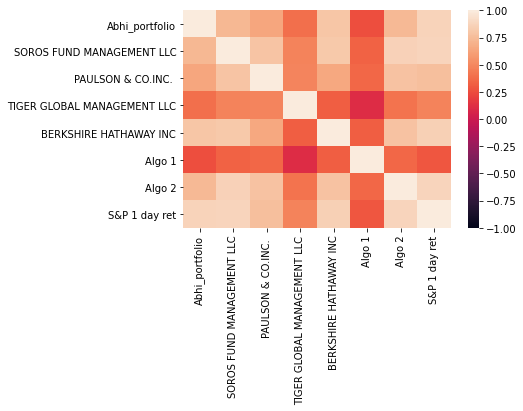

In [458]:
#Plot heat-map
sns.heatmap(corr_comb_2, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':"30 day beta of Abhi's portfolio"}, xlabel='date'>

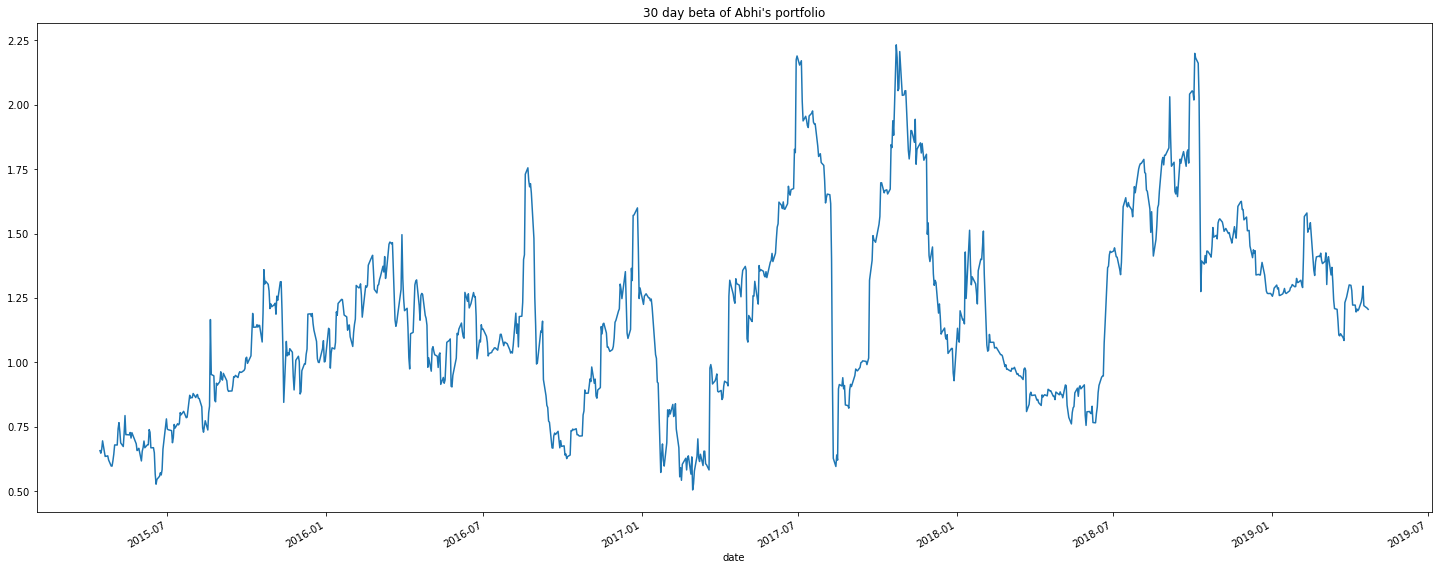

In [462]:
# Calculate and plot Beta
# Calculate variance of S&P 500

Total_ret["S&P 1 day ret"].var()

#Calculate rolling variance for a 30 day period in order to calculate the 30-day Beta
abhi_covar = Total_ret['Abhi_portfolio'].rolling(window=30).cov(Total_ret["S&P 1 day ret"])

roll_var_sp = Total_ret['S&P 1 day ret'].rolling(window=30).var()
beta30_abhi = abhi_covar / roll_var_sp

#Plot Beta

beta30.plot(figsize=(25, 10), title="30 day beta of Abhi's portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [463]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_2 = Total_ret.mean()*252/(Total_ret.std()*np.sqrt(252))
sharpe_ratios_2

Abhi_portfolio                 0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 1 day ret                  0.584820
dtype: float64

<AxesSubplot:title={'center':"Comparative Sharpe Ratios with Abhi's portfolio"}>

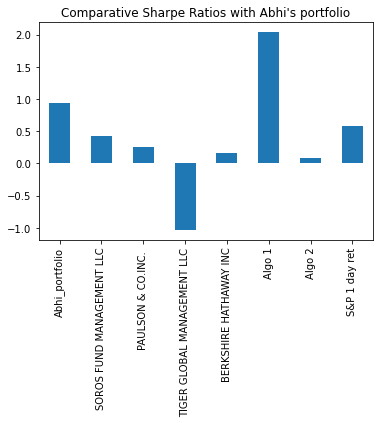

In [464]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(kind = "bar", title = "Comparative Sharpe Ratios with Abhi's portfolio")

### How does your portfolio do?

Write your answer here!

> Abhi's portfolio outperforms the all the other portfolio's except the Algo 1 portfolio